In [1]:
from datetime import date

# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np
import sidetable
# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy.stats import levene
import researchpy as rp
from scipy import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Barra de progreso de un proceso
# ------------------------------------------------------------------------------
from tqdm import tqdm
# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns=None


In [2]:
df_original = pd.read_csv('/mnt/c/Users/antoa/Desktop/ADALAB/copias proyecto/bikes_limpio2.csv', index_col=0)
df_original.head(2)

index        date  season  year  month  holiday  weeakday  weathersit  \
0      1  2018-01-01  winter     0      1        1         1           2   
1      2  2018-01-02  winter     0      1        0         2           2   

   sensation  humidity  windspeed  casual  registered  count  
0   18.18125   80.5833  10.749882     331         654    985  
1   17.68695   69.6087  16.652113     131         670    801

In [3]:
df=df_original.copy()
df.reset_index(drop=True, inplace=True)
df.head(2)

index        date  season  year  month  holiday  weeakday  weathersit  \
0      1  2018-01-01  winter     0      1        1         1           2   
1      2  2018-01-02  winter     0      1        0         2           2   

   sensation  humidity  windspeed  casual  registered  count  
0   18.18125   80.5833  10.749882     331         654    985  
1   17.68695   69.6087  16.652113     131         670    801

In [4]:
df.drop(["date","index","casual"], axis=1, inplace=True)
df.head(2)

season  year  month  holiday  weeakday  weathersit  sensation  humidity  \
0  winter     0      1        1         1           2   18.18125   80.5833   
1  winter     0      1        0         2           2   17.68695   69.6087   

   windspeed  registered  count  
0  10.749882         654    985  
1  16.652113         670    801

### Variables predictoras

#### Variables numericas

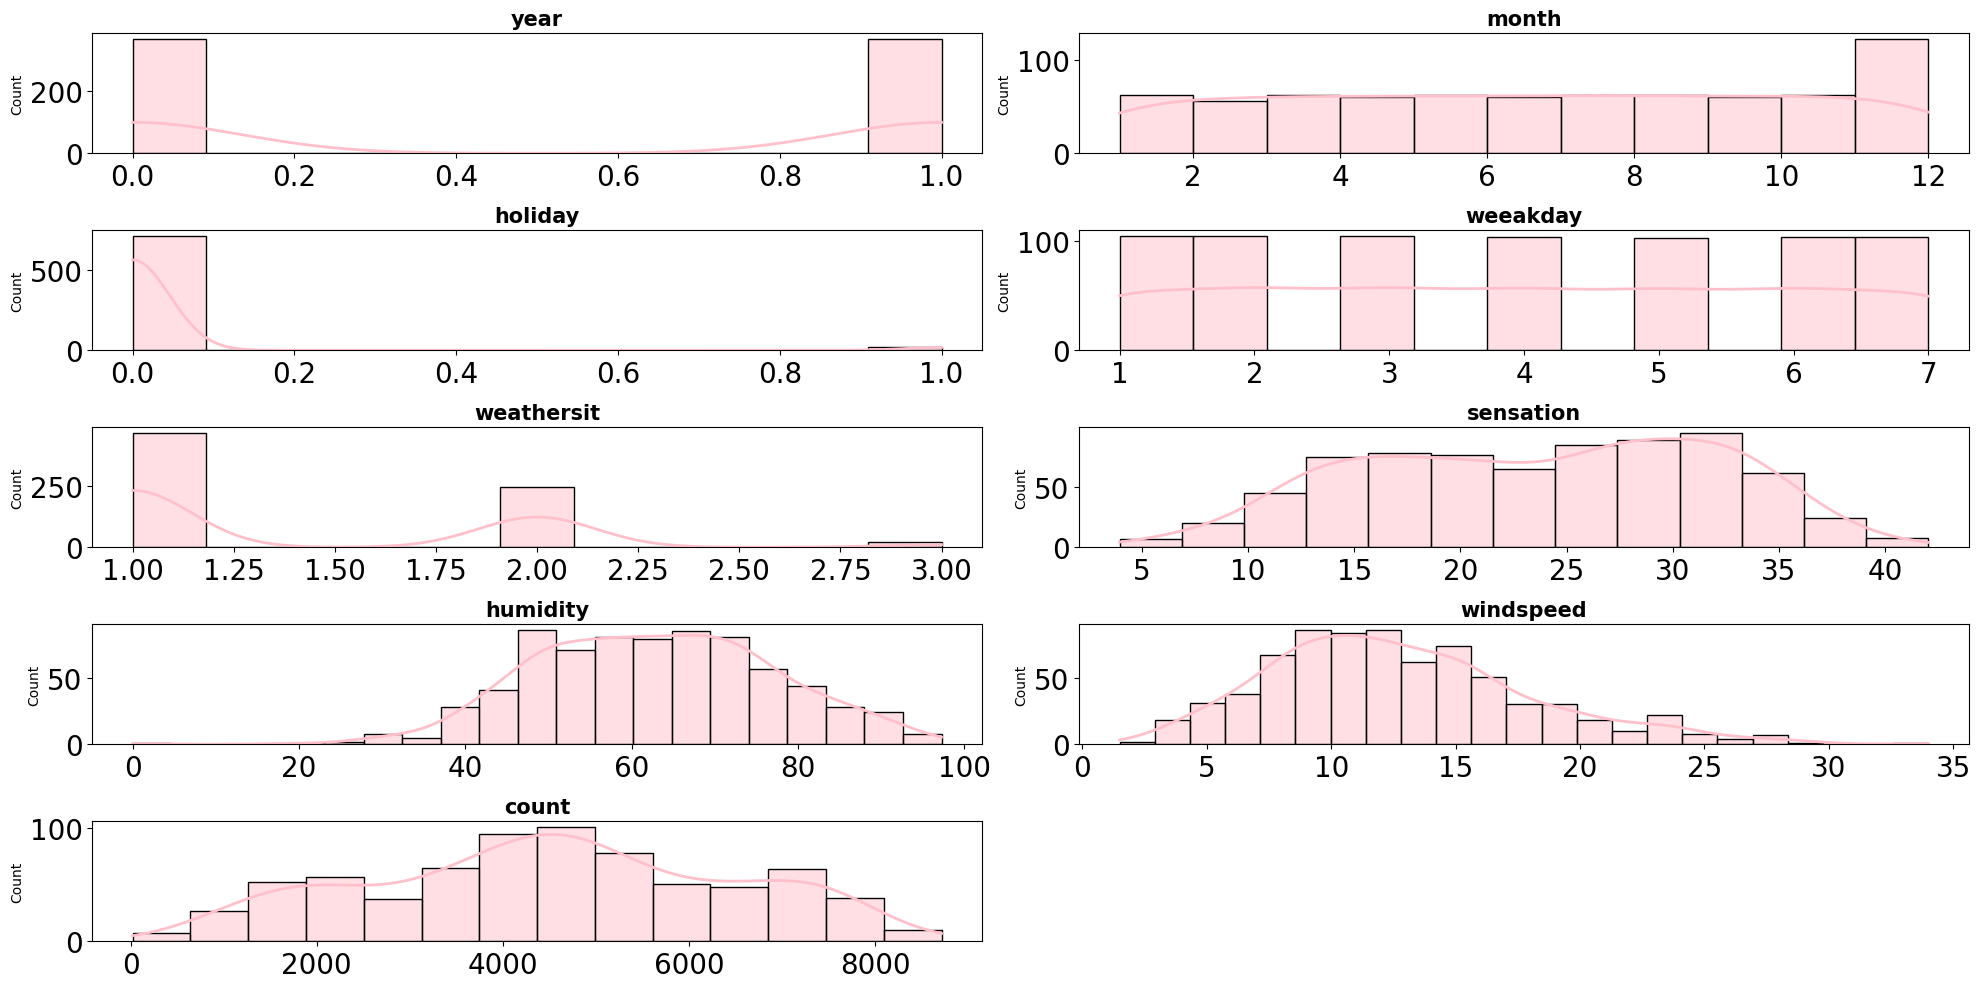

In [5]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (20,10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include = [np.number, "category"]).columns
columnas_numeric = columnas_numeric.drop(["registered"])

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = "pink", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])

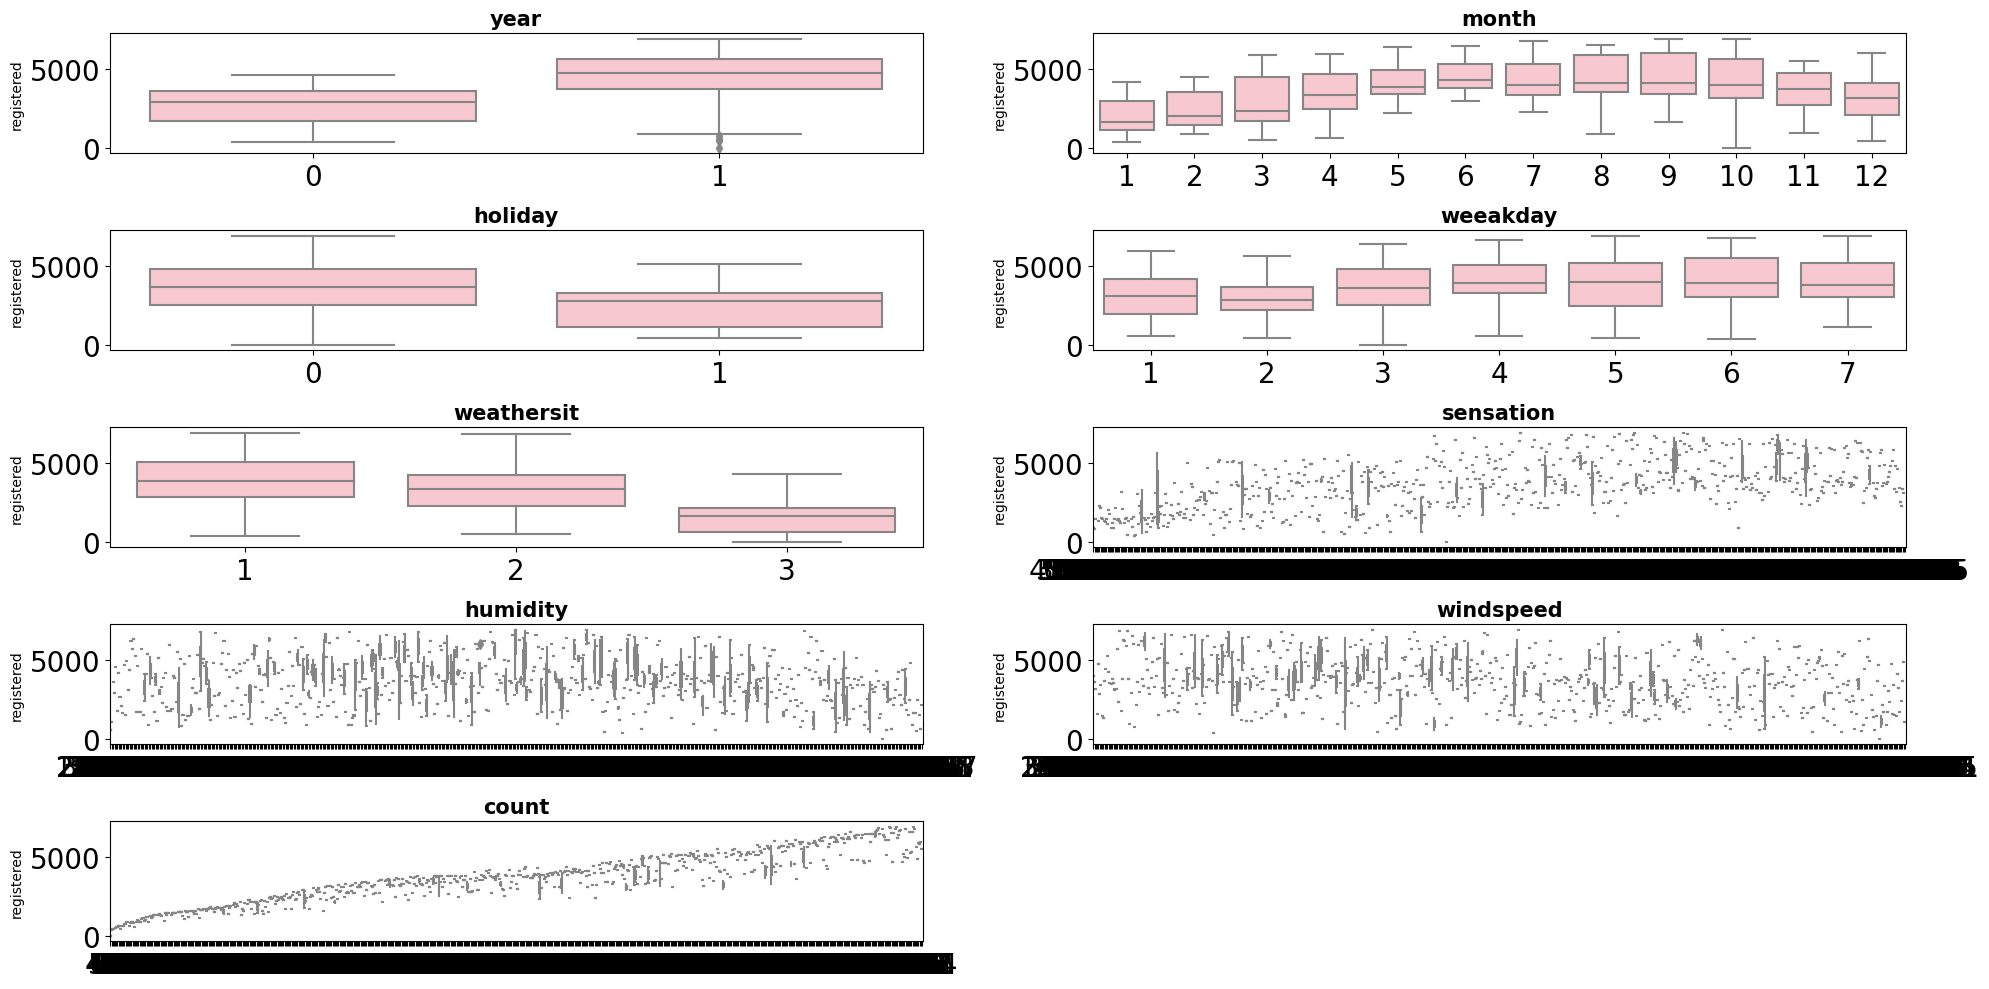

In [6]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (20,10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include = [np.number, "category"]).columns
columnas_numeric = columnas_numeric.drop(["registered"])

for i, colum in enumerate(columnas_numeric): 
    sns.boxplot(
        data = df,
        y = "registered",
        x=colum,
        color = "pink", 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])

<AxesSubplot:xlabel='weathersit', ylabel='registered'>

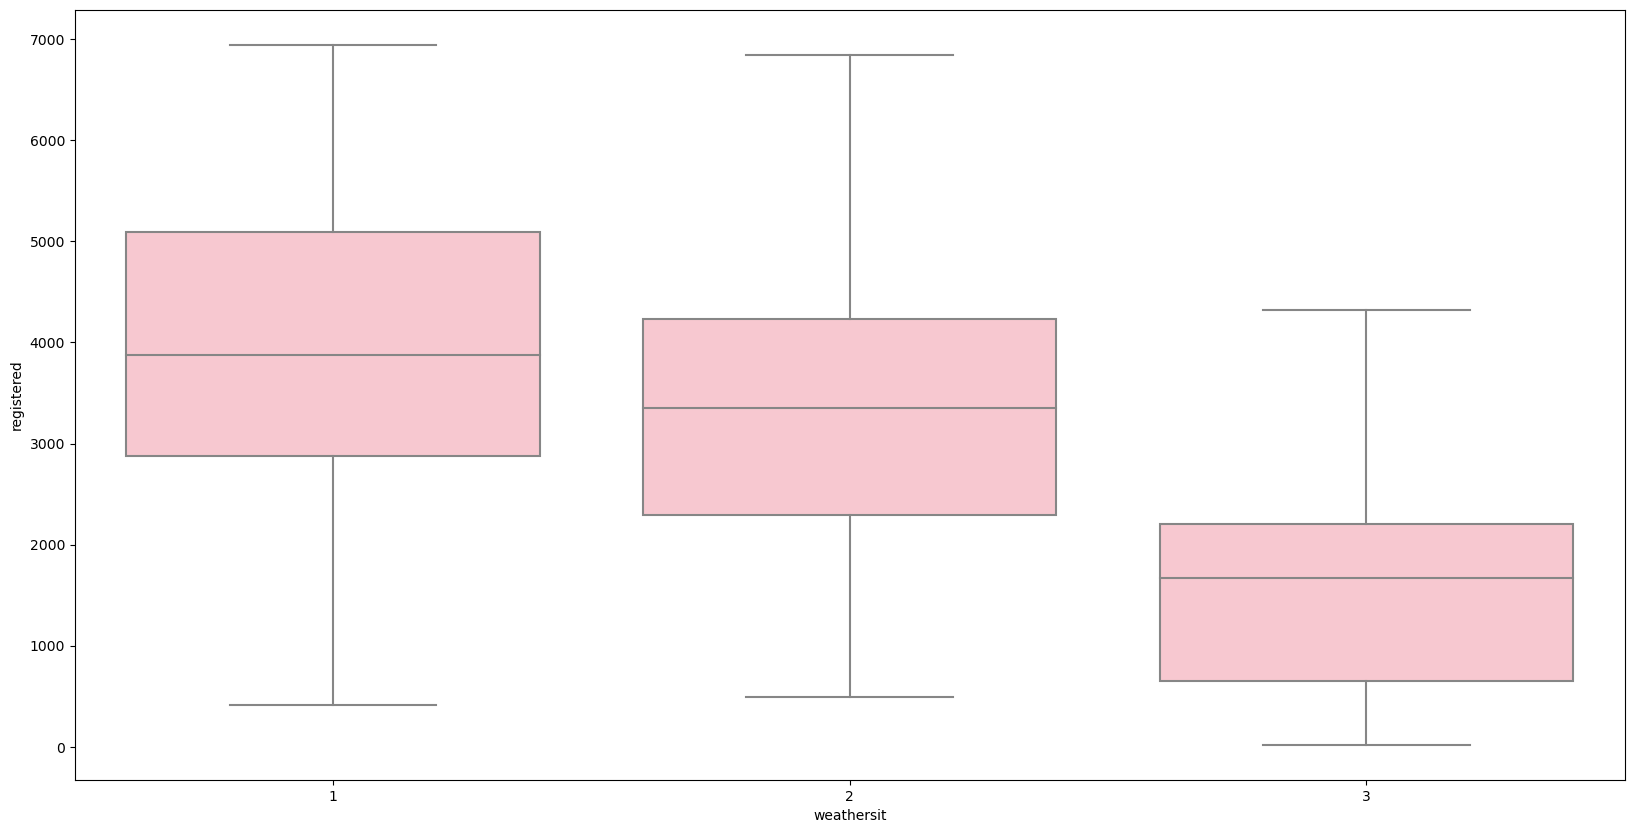

In [7]:
plt.figure(figsize=(20,10))
sns.boxplot( 
        data = df,
        y = "registered",
        x="weathersit",
        color = "pink")

<AxesSubplot:xlabel='weeakday', ylabel='registered'>

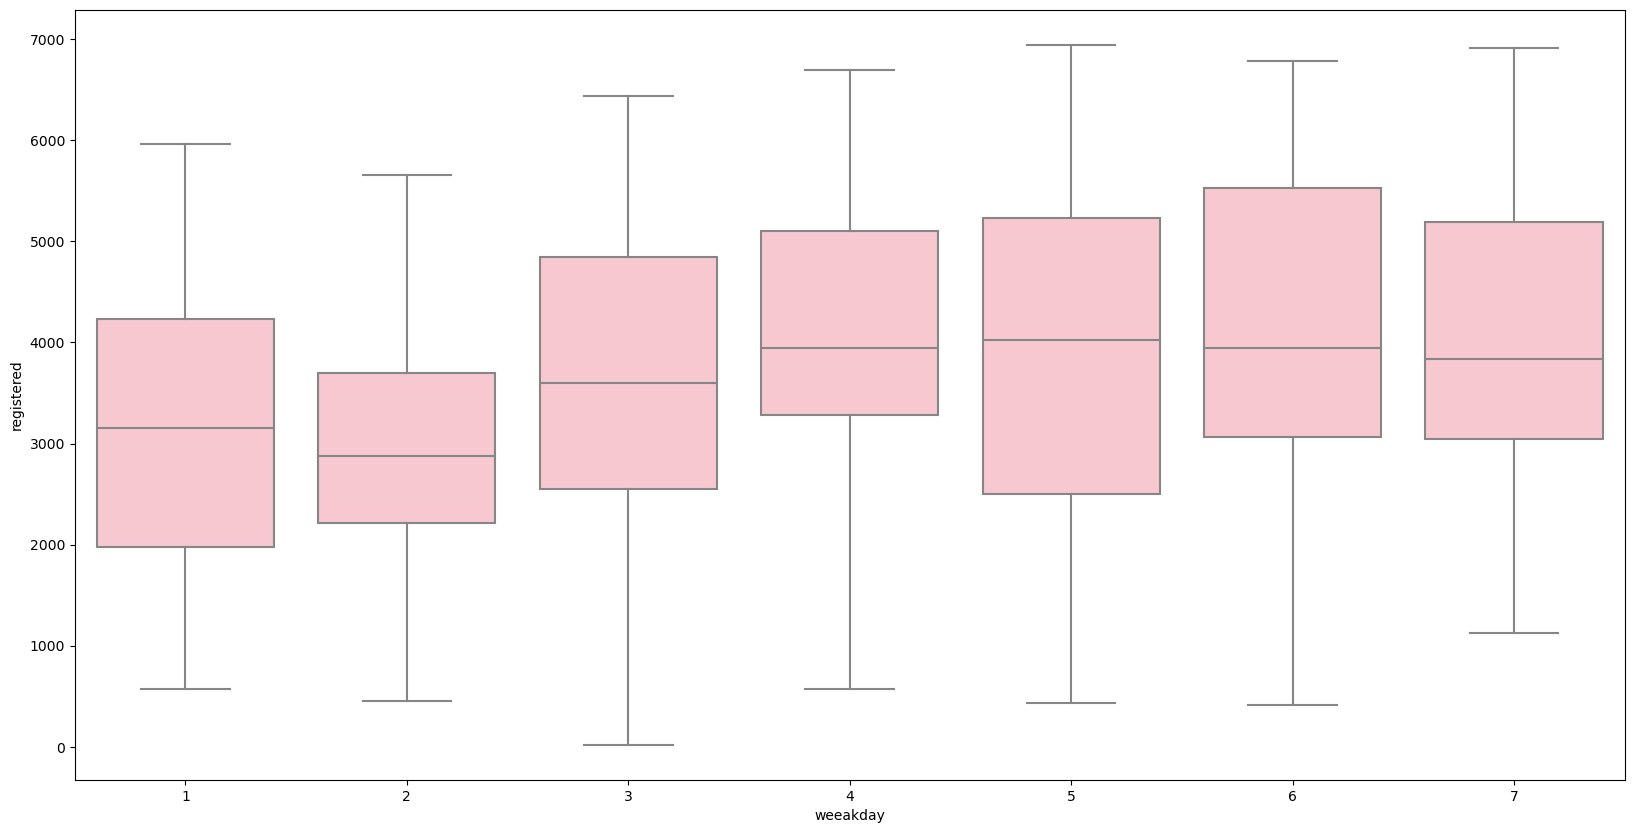

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot( 
        data = df,
        y = "registered",
        x="weeakday",
        color = "pink")

<AxesSubplot:xlabel='month', ylabel='registered'>

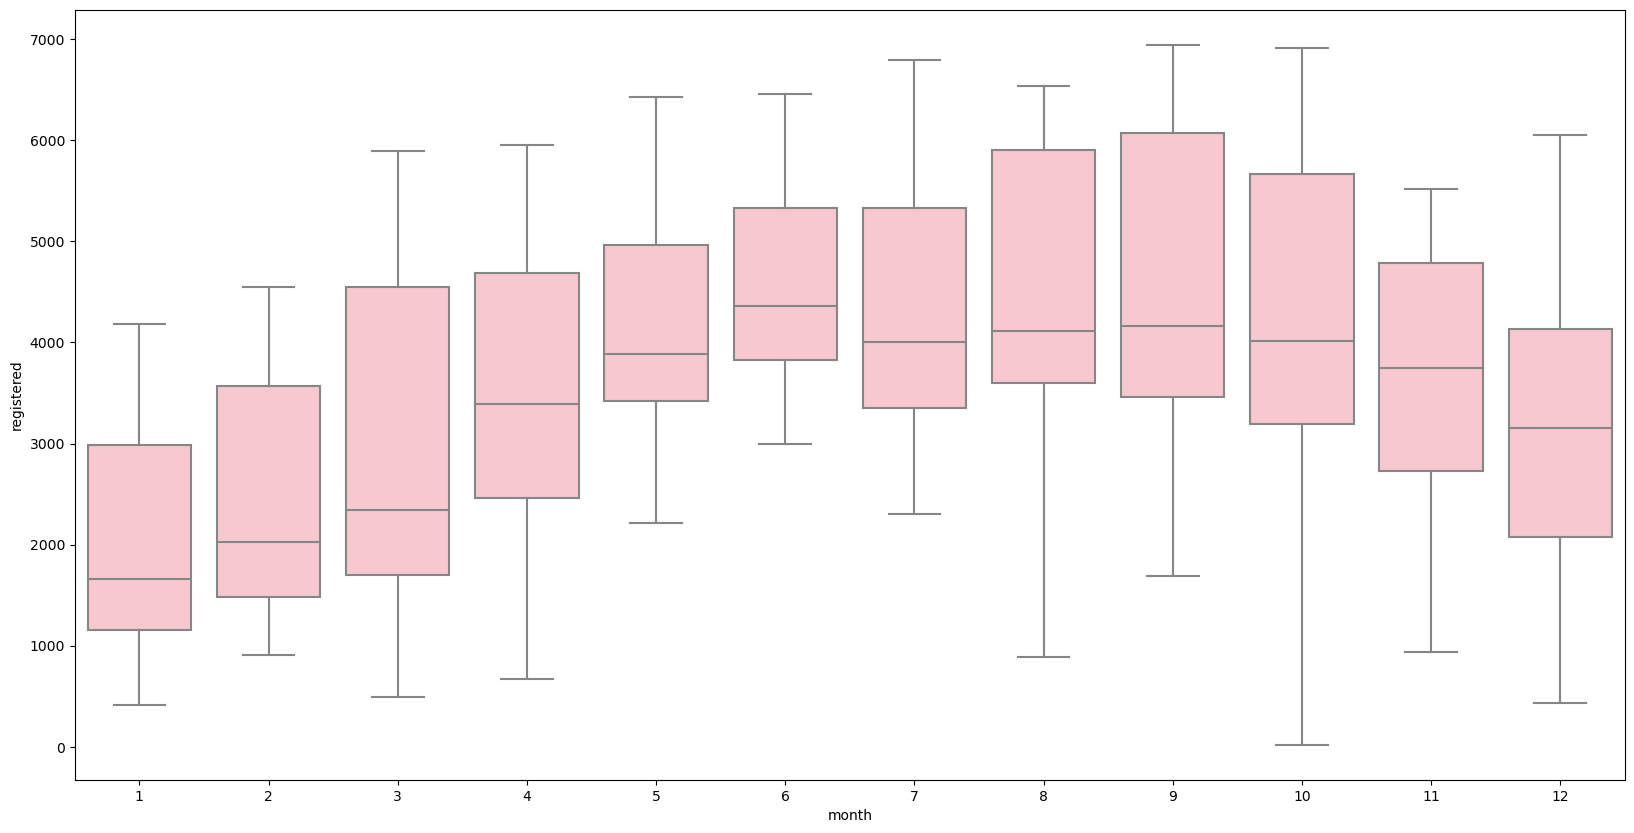

In [9]:
plt.figure(figsize=(20,10))
sns.boxplot( 
        data = df,
        y = "registered",
        x="month",
        color = "pink")